In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv(r'alexa.csv',delimiter='\t',quoting=3)
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
data['length'] = data['verified_reviews'].apply(len)

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [ ]:
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

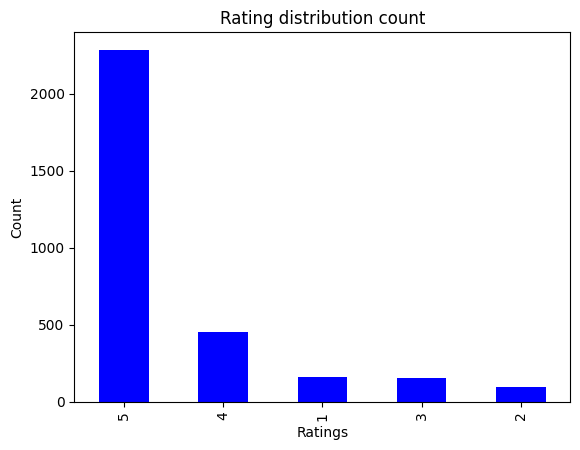

In [ ]:
data['rating'].value_counts().plot.bar(color = 'blue')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

ValueError: incomplete format

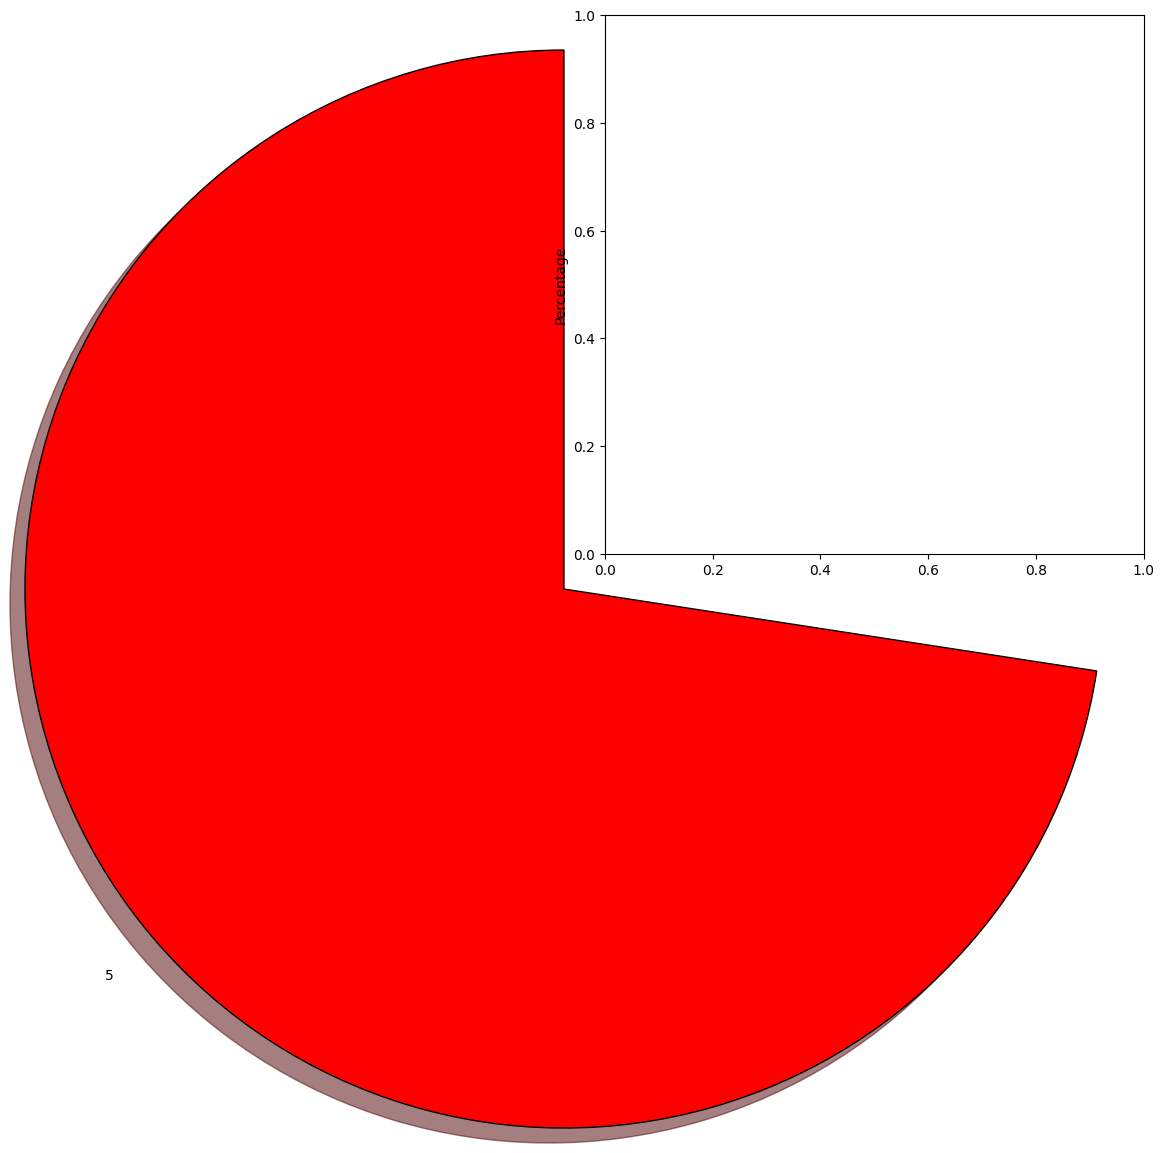

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ('red','blue','green','orange','yellow')
wp = {'linewidth':1, 'edgecolor':'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode= (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie',autopct = '%1.1f%',shadow=True,colors=colors,startangle=90,explode=explode,wedgeprops=wp,label='Percentage')
from io import BytesIO
graph = BytesIO()
fig.save(graph,format='png')

In [ ]:
data['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [ ]:
review_0 = data[data['feedback']==0].iloc[1]['verified_reviews']
print(review_0)
review_1 = data[data['feedback']==1].iloc[1]['verified_reviews']
print(review_1)

Sound is terrible if u want good music too get a bose
Loved it!


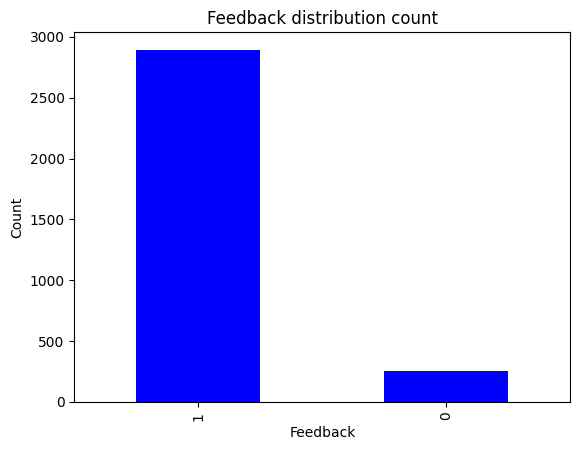

In [ ]:
data['feedback'].value_counts().plot.bar(color='blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()



In [ ]:
data['feedback'].value_counts()/data.shape[0]*100

1    91.84127
0     8.15873
Name: feedback, dtype: float64

In [ ]:
data[data['feedback']==0]['rating'].value_counts()

1    161
2     96
Name: rating, dtype: int64

In [ ]:
data[data['feedback']==1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

In [ ]:
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

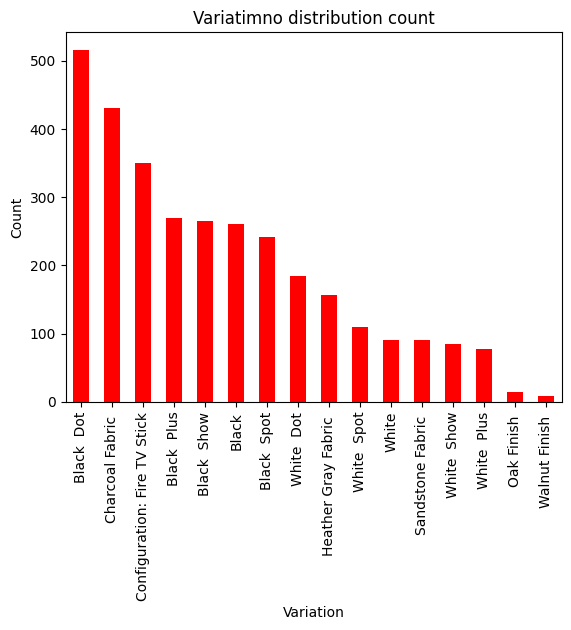

In [ ]:
data['variation'].value_counts().plot.bar(color='red')
plt.title('Variatimno distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
data['variation'].value_counts()/data.shape[0]*100

Black  Dot                      16.380952
Charcoal Fabric                 13.650794
Configuration: Fire TV Stick    11.111111
Black  Plus                      8.571429
Black  Show                      8.412698
Black                            8.285714
Black  Spot                      7.650794
White  Dot                       5.841270
Heather Gray Fabric              4.984127
White  Spot                      3.460317
White                            2.888889
Sandstone Fabric                 2.857143
White  Show                      2.698413
White  Plus                      2.476190
Oak Finish                       0.444444
Walnut Finish                    0.285714
Name: variation, dtype: float64

In [ ]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

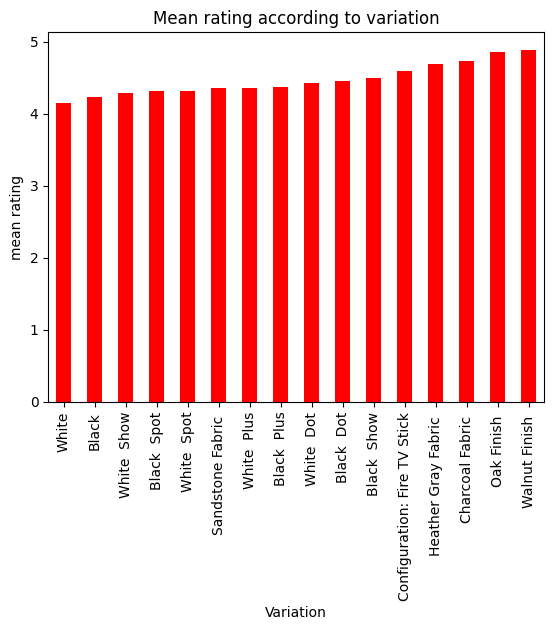

In [ ]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='red')
plt.title('Mean rating according to variation')
plt.xlabel('Variation')
plt.ylabel('mean rating')
plt.show()

In [ ]:
data['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

()

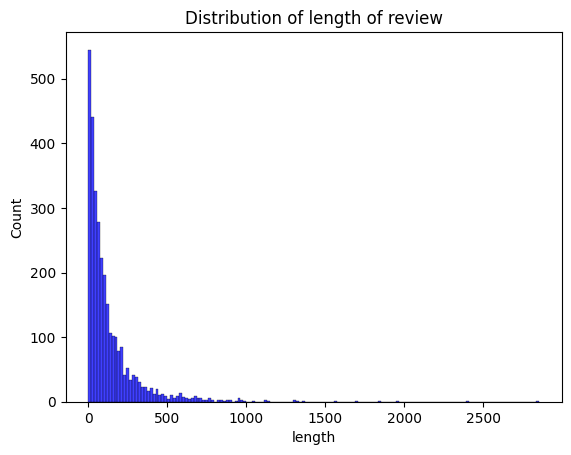

In [ ]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review')


[Text(0.5, 1.0, 'Distribtion of length og recire oif feeback=0')]

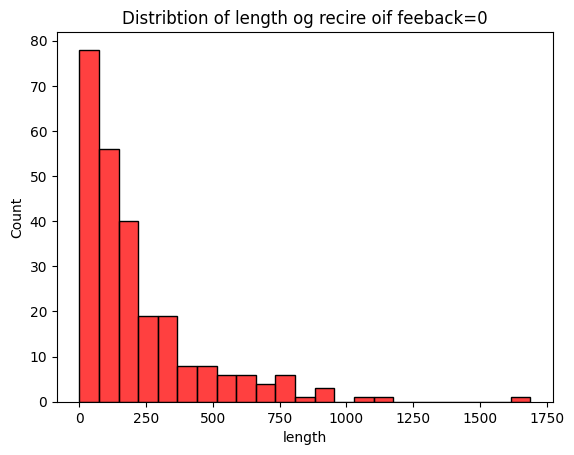

In [ ]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribtion of length of review if feeback=0')

[Text(0.5, 1.0, 'Distribtion of length of review if feeback=1')]

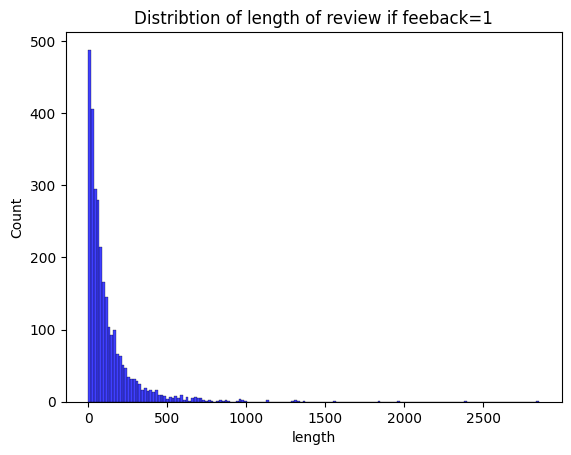

In [ ]:
sns.histplot(data[data['feedback']==1]['length'],color='blue').set(title='Distribtion of length of review if feeback=1')

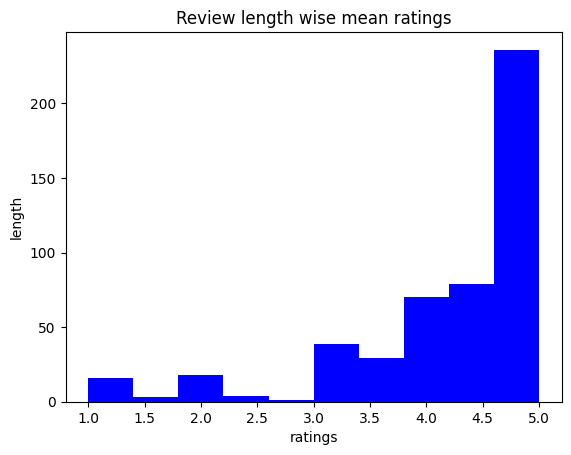

In [ ]:
data.groupby('length')['rating'].mean().plot.hist(color='blue')
plt.title('Review length wise mean ratings')
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

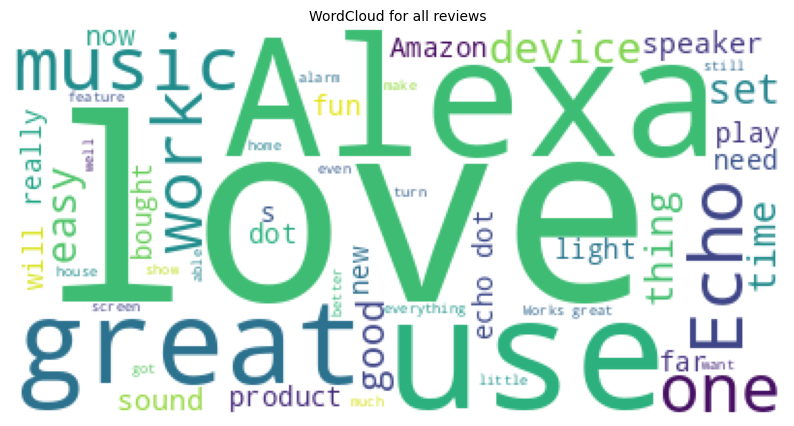

In [ ]:
reviews = ' '.join([review for review in data['verified_reviews']])
wc = WordCloud(background_color = 'white',max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('WordCloud for all reviews',fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
neg_reviews = ' '.join([review for review in data[data['feedback']==0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = ' '.join([review for review in data[data['feedback']==1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = ' '.join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = ' '.join(unique_positive)




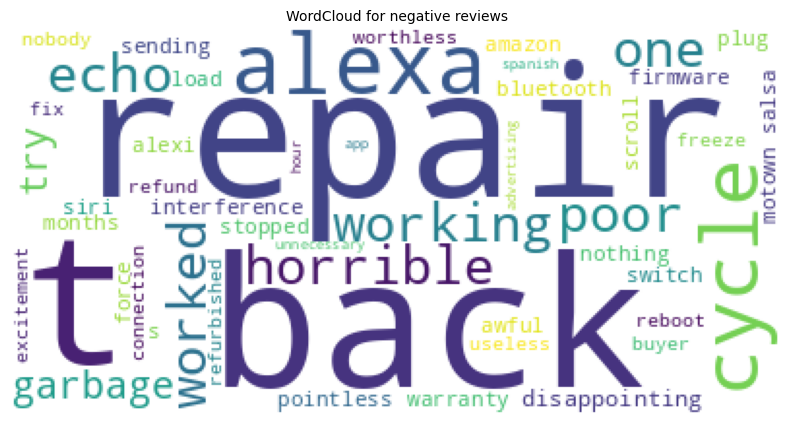

In [ ]:
wc = WordCloud(background_color = 'white',max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('WordCloud for negative reviews',fontsize=10)
plt.axis('off')
plt.show()

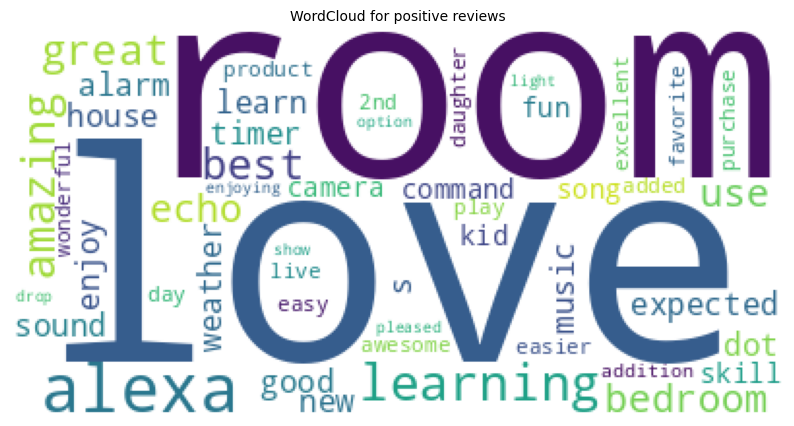

In [ ]:
wc = WordCloud(background_color = 'white',max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('WordCloud for positive reviews',fontsize=10)
plt.axis('off')
plt.show()

Preprocessing and Modelling

In [ ]:
corpus = []
stemmer = PorterStemmer()
for i in range(0,data.shape[0]):
  review = re.sub('[^a-zA-Z]',' ',data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
cv = CountVectorizer(max_features = 2500)
x= cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [ ]:
print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


In [ ]:
print(x_train.max())
print(x_test.max())

12
10


In [ ]:
scaler = MinMaxScaler()
x_train_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.transform(x_test)

Random Forest

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
print('training accuracy: ',model_rf.score(x_train_scl,y_train))
print('testing accuracy: ',model_rf.score(x_test_scl,y_test))

training accuracy:  0.9410430839002267
testing accuracy:  0.9248677248677248


In [ ]:
y_preds = model_rf.predict(x_test_scl)
cm= confusion_matrix(y_test,y_preds)

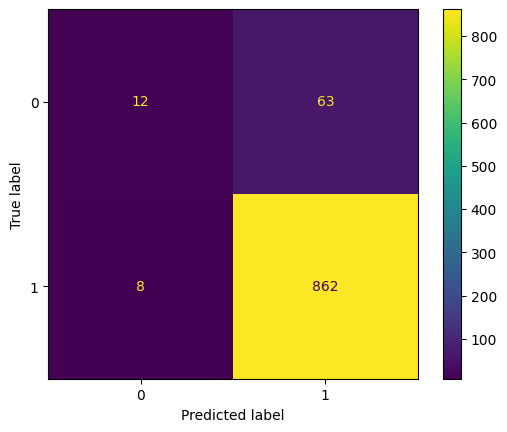

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf.classes_)
cm_display.plot()
plt.show()

k-fold Cross validation

In [ ]:
accuracies = cross_val_score(estimator = model_rf,X=x_train_scl,y=y_train,cv=10)
print('Accuracy: ',accuracies.mean())
print('SD: ',accuracies.std())

Accuracy:  0.9342533936651582
SD:  0.011064339283065133


grid search cv

In [ ]:
params = {
    'bootstrap':[True],
    'max_depth':[80,100],
    'min_samples_split':[8,12],
    'n_estimators':[100,300]
}

In [ ]:
cv_object = StratifiedKFold(n_splits =2)
grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose=0,return_train_score=True)
grid_search.fit(x_train,y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [ ]:
print('Best Parameters {}'.format(grid_search.best_params_))

Best Parameters {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 12, 'n_estimators': 100}


In [ ]:
print('Cross validation mean accuracy on train set {}'.format(grid_search.cv_results_['mean_train_score'].mean()*100))
print('Cross validation mean accuracy on test set {}'.format(grid_search.cv_results_['mean_test_score'].mean()*100))
print('Accuracy score for test set: ',accuracy_score(y_test,y_preds))

Cross validation mean accuracy on train set 96.93901140759486
Cross validation mean accuracy on test set 92.17673030820086
Accuracy score for test set:  0.9248677248677248


XgBoost

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train_scl,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print('training accuracy: ',model_xgb.score(x_train_scl,y_train))
print('testing accuracy: ',model_xgb.score(x_test_scl,y_test))

training accuracy:  0.9700680272108844
testing accuracy:  0.9407407407407408


In [ ]:
y_preds = model_xgb.predict(x_test_scl)
cm= confusion_matrix(y_test,y_preds)
print(cm)

[[ 27  48]
 [  8 862]]


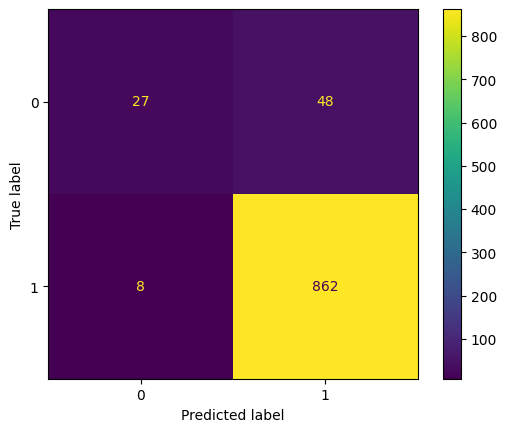

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_xgb.classes_)
cm_display.plot()
plt.show()

Decision tree

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print('training accuracy: ',model_dt.score(x_train_scl,y_train))
print('testing accuracy: ',model_dt.score(x_test_scl,y_test))

training accuracy:  0.9378684807256236
testing accuracy:  0.9047619047619048


In [ ]:
y_preds = model_dt.predict(x_test_scl)
cm= confusion_matrix(y_test,y_preds)
print(cm)

[[ 17  58]
 [ 32 838]]


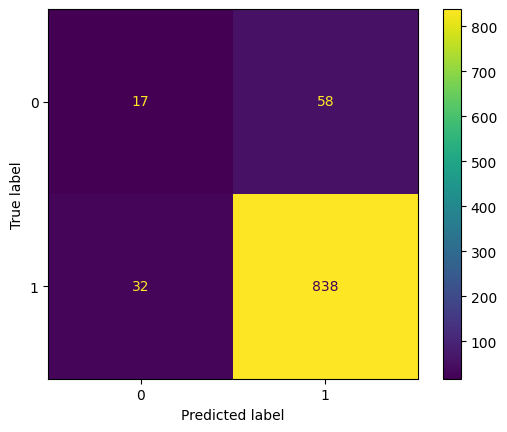

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_dt.classes_)
cm_display.plot()
plt.show()